In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 200)


In [53]:
# Custom imports

from helpers.data_helper import load_data, load_true_labels, add_labels_to_dataset, split_data, save_models_to_disk

In [3]:
# PATHS - Change these to use different data from the dataset!

# 1. santos | inet-firewall | dnsmasq.log
path_santos = "../AIT_LD-v2/santos"
path_log_file = "/gather/inet-firewall/logs/dnsmasq.log"
path_true_labels_file = "/labels/inet-firewall/logs/dnsmasq.log"

In [4]:
# Load the AIT log data set v2
df_raw = load_data(path_santos + path_log_file)

# Display the first few rows of the data set
#df_raw.head(5)

# Display the entries corresponding to attack (rows 144-151)
print(df_raw.iloc[144:152][0].to_string())

144    Jan 14 00:07:10 dnsmasq[14919]: forwarded 3x6-.428-.zPOF3mlr9i47ejz7k6fjKzexek6DOrG6f9hQoaBCtIint2BBuPivP5f8x*dh-.Jmo1kGP9sKiPB4bn*LATe2s1oty83gIz6HFXBBPNmJHsDXJ3toPbVJRdRlx/-.kRiUl6VXnRdVRKAfh5Ng...
145    Jan 14 00:07:10 dnsmasq[14919]: reply 3x6-.428-.zPOF3mlr9i47ejz7k6fjKzexek6DOrG6f9hQoaBCtIint2BBuPivP5f8x*dh-.Jmo1kGP9sKiPB4bn*LATe2s1oty83gIz6HFXBBPNmJHsDXJ3toPbVJRdRlx/-.kRiUl6VXnRdVRKAfh5Ng0NL7...
146    Jan 14 00:07:27 dnsmasq[14919]: query[A] 3x6-.429-.sVoX4oPJXe9p/gmJzQDomEyxt7NEBROiZLxcpnPYI0HKQH/q5uQzmiibA94O-.4I1TutZwMa9Shg7Q1TxENbzW*6otraHpTRLsLi8HrYK4UiRP8o7n4x8B2kvL-.QD*4biBt3WNgboL4jw4sA...
147    Jan 14 00:07:27 dnsmasq[14919]: forwarded 3x6-.429-.sVoX4oPJXe9p/gmJzQDomEyxt7NEBROiZLxcpnPYI0HKQH/q5uQzmiibA94O-.4I1TutZwMa9Shg7Q1TxENbzW*6otraHpTRLsLi8HrYK4UiRP8o7n4x8B2kvL-.QD*4biBt3WNgboL4jw4s...
148    Jan 14 00:07:27 dnsmasq[14919]: reply 3x6-.429-.sVoX4oPJXe9p/gmJzQDomEyxt7NEBROiZLxcpnPYI0HKQH/q5uQzmiibA94O-.4I1TutZwMa9Shg7Q1TxENbzW*6otraHpTRLsLi8HrYK4UiRP8o7n4x8

In [5]:
# load true labels from json
df_true_labels = load_true_labels(path_santos + path_true_labels_file)

df_true_labels.head(10)

,line,labels,rules
0,1,"[dnsteal, attacker, dnsteal-received]","{'dnsteal': ['dnsteal.domain.match'], 'attacker': ['dnsteal.domain.match'], 'dnsteal-received': ['dnsteal.domain.received']}"
1,2,"[dnsteal, attacker, dnsteal-received]","{'dnsteal': ['dnsteal.domain.match'], 'attacker': ['dnsteal.domain.match'], 'dnsteal-received': ['dnsteal.domain.received']}"
2,3,"[dnsteal, attacker, dnsteal-received]","{'dnsteal': ['dnsteal.domain.match'], 'attacker': ['dnsteal.domain.match'], 'dnsteal-received': ['dnsteal.domain.received']}"
3,50,"[dnsteal, attacker, dnsteal-received]","{'dnsteal': ['dnsteal.domain.match'], 'attacker': ['dnsteal.domain.match'], 'dnsteal-received': ['dnsteal.domain.received']}"
4,51,"[dnsteal, attacker, dnsteal-received]","{'dnsteal': ['dnsteal.domain.match'], 'attacker': ['dnsteal.domain.match'], 'dnsteal-received': ['dnsteal.domain.received']}"
5,52,"[dnsteal, attacker, dnsteal-received]","{'dnsteal': ['dnsteal.domain.match'], 'attacker': ['dnsteal.domain.match'], 'dnsteal-received': ['dnsteal.domain.received']}"
6,53,"[dnsteal, attacker, dnsteal-received]","{'dnsteal': ['dnsteal.domain.match'], 'attacker': ['dnsteal.domain.match'], 'dnsteal-received': ['dnsteal.domain.received']}"
7,54,"[dnsteal, attacker, dnsteal-received]","{'dnsteal': ['dnsteal.domain.match'], 'attacker': ['dnsteal.domain.match'], 'dnsteal-received': ['dnsteal.domain.received']}"
8,55,"[dnsteal, attacker, dnsteal-received]","{'dnsteal': ['dnsteal.domain.match'], 'attacker': ['dnsteal.domain.match'], 'dnsteal-received': ['dnsteal.domain.received']}"
9,72,"[dnsteal, attacker, dnsteal-received]","{'dnsteal': ['dnsteal.domain.match'], 'attacker': ['dnsteal.domain.match'], 'dnsteal-received': ['dnsteal.domain.received']}"


In [6]:
df_raw.head()

# For santos: This block corresponds to wpscan / foothold attack-step,
# the requests have normal signature but are still attack-related!
# TODO: Double-check if they are detected (and find unseen example of same step to test as well)
#df_raw.iloc[237780:237787]

,0
0,Jan 14 00:00:09 dnsmasq[14919]: query[A] 3x6-.401-.ScGCirxO*xUUf11BDIVfdMkwtfLsy2ucymJoDJF3Wc6aMCjrkVGQgAdlfu19-.XGFY7RhrAIBIx5BO31H87XPzZSDHhzqSMDcEcqO/8wdIo85TAgpjFaaF*vNJ-.NjUVixrsUrqFNljJV6r91...
1,Jan 14 00:00:09 dnsmasq[14919]: forwarded 3x6-.401-.ScGCirxO*xUUf11BDIVfdMkwtfLsy2ucymJoDJF3Wc6aMCjrkVGQgAdlfu19-.XGFY7RhrAIBIx5BO31H87XPzZSDHhzqSMDcEcqO/8wdIo85TAgpjFaaF*vNJ-.NjUVixrsUrqFNljJV6r9...
2,Jan 14 00:00:09 dnsmasq[14919]: reply 3x6-.401-.ScGCirxO*xUUf11BDIVfdMkwtfLsy2ucymJoDJF3Wc6aMCjrkVGQgAdlfu19-.XGFY7RhrAIBIx5BO31H87XPzZSDHhzqSMDcEcqO/8wdIo85TAgpjFaaF*vNJ-.NjUVixrsUrqFNljJV6r91yyy...
3,Jan 14 00:00:23 dnsmasq[14919]: query[SRV] _http._tcp.security.ubuntu.com from 172.21.128.119
4,Jan 14 00:00:23 dnsmasq[14919]: forwarded _http._tcp.security.ubuntu.com to 10.229.255.254


In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275667 entries, 0 to 275666
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       275667 non-null  object
dtypes: object(1)
memory usage: 2.1+ MB


In [8]:
df_raw.describe()

,0
count,275667
unique,207381
top,Jan 14 11:22:17 dnsmasq[14919]: nameserver 127.0.0.1 refused to do a recursive query
freq,53


In [9]:
df_raw.describe(include="object")

,0
count,275667
unique,207381
top,Jan 14 11:22:17 dnsmasq[14919]: nameserver 127.0.0.1 refused to do a recursive query
freq,53


In [10]:
# Check for null values
df_raw.isnull().sum()

0    0
dtype: int64

In [11]:
# Check for duplicates
# 1. santos | inet-firewall | dnsmasq.log               duplicates: 68286, isnull: true_type: 236241, labels: 236241

df_raw.duplicated().sum()

68286

In [12]:
# -> Duplicates normal if logs are written quickly
# TODO: investigate which lines are duplicated and how to treat them. e.g. combine them and keep info about count or keep them as they are

# Remove duplicates: 
#df_raw = df_raw.drop_duplicates()
#df_raw.duplicated().sum()

In [13]:
df_raw.rename(columns={0: "message"}, inplace=True)
df_raw

,message
0,Jan 14 00:00:09 dnsmasq[14919]: query[A] 3x6-.401-.ScGCirxO*xUUf11BDIVfdMkwtfLsy2ucymJoDJF3Wc6aMCjrkVGQgAdlfu19-.XGFY7RhrAIBIx5BO31H87XPzZSDHhzqSMDcEcqO/8wdIo85TAgpjFaaF*vNJ-.NjUVixrsUrqFNljJV6r91...
1,Jan 14 00:00:09 dnsmasq[14919]: forwarded 3x6-.401-.ScGCirxO*xUUf11BDIVfdMkwtfLsy2ucymJoDJF3Wc6aMCjrkVGQgAdlfu19-.XGFY7RhrAIBIx5BO31H87XPzZSDHhzqSMDcEcqO/8wdIo85TAgpjFaaF*vNJ-.NjUVixrsUrqFNljJV6r9...
2,Jan 14 00:00:09 dnsmasq[14919]: reply 3x6-.401-.ScGCirxO*xUUf11BDIVfdMkwtfLsy2ucymJoDJF3Wc6aMCjrkVGQgAdlfu19-.XGFY7RhrAIBIx5BO31H87XPzZSDHhzqSMDcEcqO/8wdIo85TAgpjFaaF*vNJ-.NjUVixrsUrqFNljJV6r91yyy...
3,Jan 14 00:00:23 dnsmasq[14919]: query[SRV] _http._tcp.security.ubuntu.com from 172.21.128.119
4,Jan 14 00:00:23 dnsmasq[14919]: forwarded _http._tcp.security.ubuntu.com to 10.229.255.254
...,...
275662,Jan 17 23:44:37 dnsmasq[14919]: reply motd.ubuntu.com is 2a05:d018:91c:3200:2846:99fb:81b6:1e11
275663,Jan 17 23:44:37 dnsmasq[14919]: reply motd.ubuntu.com is 34.243.160.129
275664,Jan 17 23:44:37 dnsmasq[14919]: reply motd.ubuntu.com is 54.171.230.55
275665,Jan 17 23:58:37 dnsmasq[14919]: query[AAAA] mail from 172.21.131.50


In [14]:
# Parse the log lines into a structured format using regex

import re
import pandas as pd

# Parse the log lines and match them to their message type using manually defined regular expressions
def parse_log(log_lines):
    data = []

    # Regular expressions for each type of log line

    # Query patterns
    query_a_pattern = re.compile(
        r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) '
        r'dnsmasq\[\d+\]: query\[A\] '
        r'(?P<domain>[^\s]+) '
        r'from (?P<src_ip>[^\s]+)'
    )
    query_aaaa_pattern = re.compile(
        r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) '
        r'dnsmasq\[\d+\]: query\[AAAA\] '
        r'(?P<domain>[^\s]+) '
        r'from (?P<src_ip>[^\s]+)'
    )
    query_srv_pattern = re.compile(
        r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) '
        r'dnsmasq\[\d+\]: query\[SRV\] '
        r'(?P<domain>[^\s]+) '
        r'from (?P<src_ip>[^\s]+)'
    )
    query_txt_pattern = re.compile(
        r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) '
        r'dnsmasq\[\d+\]: query\[TXT\] '
        r'(?P<domain>[^\s]+) '
        r'from (?P<src_ip>[^\s]+)'
    )
    query_ptr_pattern = re.compile(
    r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) '
    r'dnsmasq\[\d+\]: query\[PTR\] '
    r'(?P<domain>[^\s]+) '
    r'from (?P<src_ip>[^\s]+)$'
    )
    query_mx_pattern = re.compile(
    r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) '
    r'dnsmasq\[\d+\]: query\[MX\] '
    r'(?P<domain>[^\s]+) '
    r'from (?P<src_ip>[^\s]+)$'
    )
    
    # Forwarded pattern
    forwarded_pattern = re.compile(
        r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) '
        r'dnsmasq\[\d+\]: forwarded '
        r'(?P<domain>[^\s]+) '
        r'to (?P<dst_ip>[^\s]+)'
    )

    # Reply pattern
    reply_pattern = re.compile(
        r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) '
        r'dnsmasq\[\d+\]: reply '
        r'(?P<domain>[^\s]+) '
        r'is (?P<resolved_ip>[^\s]+)'
    )

    # Cached pattern
    cached_pattern = re.compile(
        r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) '
        r'dnsmasq\[\d+\]: cached '
        r'(?P<domain>[^\s]+) '
        r'is (?P<resolved_ip>[^\s]+)'
    )

    # Nameserver pattern
    nameserver_pattern = re.compile(
        r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) '
        r'dnsmasq\[\d+\]: nameserver '
        r'(?P<nameserver_ip>[^\s]+) '
        r'refused to do a recursive query$'
    )

    # Loop over every line in the log file and match it to a pattern
    for line in log_lines:
        #Query
        if match := query_a_pattern.match(line):
            match_data = match.groupdict()
            match_data['message_type'] = 'query_a'
            data.append(match_data)
        elif match := query_aaaa_pattern.match(line):
            match_data = match.groupdict()
            match_data['message_type'] = 'query_aaaa'
            data.append(match_data)
        elif match := query_srv_pattern.match(line):
            match_data = match.groupdict()
            match_data['message_type'] = 'query_srv'
            data.append(match_data)
        elif match := query_txt_pattern.match(line):
            match_data = match.groupdict()
            match_data['message_type'] = 'query_txt'
            data.append(match_data)
        elif match := query_ptr_pattern.match(line):
            match_data = match.groupdict()
            match_data['message_type'] = 'query_ptr'
            data.append(match_data)
        elif match := query_mx_pattern.match(line):
            match_data = match.groupdict()
            match_data['message_type'] = 'query_mx'
            data.append(match_data)

        #Forwarded
        elif match := forwarded_pattern.match(line):
            match_data = match.groupdict()
            match_data['message_type'] = 'forwarded'
            data.append(match_data)
        
        #Reply
        elif match := reply_pattern.match(line):
            match_data = match.groupdict()
            match_data['message_type'] = 'reply'
            data.append(match_data)
        
        #Cached
        elif match := cached_pattern.match(line):
            match_data = match.groupdict()
            match_data['message_type'] = 'cached'
            data.append(match_data)

        #Nameserver
        elif match := nameserver_pattern.match(line):
            match_data = match.groupdict()
            match_data['message_type'] = 'nameserver'
            data.append(match_data)

        #Default
        else:
            print(f"Line does not match any pattern: {line}")

    df = pd.DataFrame(data)
    
    # Convert timestamp to a datetime object
    df['timestamp'] = pd.to_datetime('2022 ' + df['timestamp'], format='%Y %b %d %H:%M:%S', errors='coerce')
    df["message_type"] = df["message_type"].astype(str)
    
    return df

#Call parse_log function on df['raw'] to parse the log lines
#df_raw = parse_log(df_raw["message"])


In [15]:
import re
import pandas as pd
import numpy as np
from datetime import datetime

def extract_dns_features(log_lines):
    """Extract features from DNS logs focusing on domains and message types"""
    
    data = []
    
    # Regular expressions for each type of log line
    patterns = {
        'query_a': re.compile(r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) dnsmasq\[\d+\]: query\[A\] (?P<domain>[^\s]+)'),
        'query_aaaa': re.compile(r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) dnsmasq\[\d+\]: query\[AAAA\] (?P<domain>[^\s]+)'),
        'query_srv': re.compile(r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) dnsmasq\[\d+\]: query\[SRV\] (?P<domain>[^\s]+)'),
        'query_txt': re.compile(r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) dnsmasq\[\d+\]: query\[TXT\] (?P<domain>[^\s]+)'),
        'query_ptr': re.compile(r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) dnsmasq\[\d+\]: query\[PTR\] (?P<domain>[^\s]+)'),
        'query_mx': re.compile(r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) dnsmasq\[\d+\]: query\[MX\] (?P<domain>[^\s]+)'),
        'forwarded': re.compile(r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) dnsmasq\[\d+\]: forwarded (?P<domain>[^\s]+)'),
        'reply': re.compile(r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) dnsmasq\[\d+\]: reply (?P<domain>[^\s]+)'),
        'cached': re.compile(r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) dnsmasq\[\d+\]: cached (?P<domain>[^\s]+)'),
        'nameserver': re.compile(r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) dnsmasq\[\d+\]: nameserver')  # No domain in nameserver messages
    }
    
    def extract_domain_features(domain):
        """Extract features from a domain name"""
        if pd.isna(domain):
            return {
                'domain_length': 0,
                'domain_parts': 0,
                'avg_part_length': 0,
                'max_part_length': 0,
                'special_char_count': 0,
                'numeric_char_count': 0,
                'alpha_char_count': 0,
                'entropy': 0
            }
            
        # Basic length features
        features = {
            'domain_length': len(domain),
            'domain_parts': len(domain.split('.')),
            'avg_part_length': np.mean([len(part) for part in domain.split('.')]),
            'max_part_length': max([len(part) for part in domain.split('.')]),
            'special_char_count': len(re.findall(r'[^a-zA-Z0-9\.]', domain)),
            'numeric_char_count': len(re.findall(r'[0-9]', domain)),
            'alpha_char_count': len(re.findall(r'[a-zA-Z]', domain))
        }
        
        # Calculate Shannon entropy
        char_freq = {}
        for char in domain:
            char_freq[char] = char_freq.get(char, 0) + 1
        entropy = 0
        for freq in char_freq.values():
            prob = freq / len(domain)
            entropy -= prob * np.log2(prob)
        features['entropy'] = entropy
        
        return features

    # Process each log line
    for line in log_lines:
        for msg_type, pattern in patterns.items():
            if match := pattern.match(line):
                entry = {
                    'message_type': msg_type,
                    'timestamp': match.group('timestamp')
                }
                
                # Add domain and its features if present in the pattern
                if 'domain' in pattern.groupindex:
                    domain = match.group('domain')
                    entry['domain'] = domain
                    entry.update(extract_domain_features(domain))
                else:
                    entry['domain'] = None
                    entry.update(extract_domain_features(None))
                    
                data.append(entry)
                break
    
    # Convert to DataFrame
    df = pd.DataFrame(data)
    
    # Convert timestamp to datetime and extract time features
    df['timestamp'] = pd.to_datetime('2022 ' + df['timestamp'], format='%Y %b %d %H:%M:%S')
    #df['hour'] = df['timestamp'].dt.hour
    #df['minute'] = df['timestamp'].dt.minute
    
    # Drop original timestamp and domain columns
    #df = df.drop(['timestamp', 'domain'], axis=1)
    
    return df

In [16]:
df_raw = extract_dns_features(df_raw["message"])

df_raw

,message_type,timestamp,domain,domain_length,domain_parts,avg_part_length,max_part_length,special_char_count,numeric_char_count,alpha_char_count,entropy
0,query_a,2022-01-14 00:00:09,3x6-.401-.ScGCirxO*xUUf11BDIVfdMkwtfLsy2ucymJoDJF3Wc6aMCjrkVGQgAdlfu19-.XGFY7RhrAIBIx5BO31H87XPzZSDHhzqSMDcEcqO/8wdIo85TAgpjFaaF*vNJ-.NjUVixrsUrqFNljJV6r91yyyh64R5jaGoN3fHBeMOnYVmD60td2yG5TVLU0K-....,250,9,26.888889,61,9,37,196,5.851807
1,forwarded,2022-01-14 00:00:09,3x6-.401-.ScGCirxO*xUUf11BDIVfdMkwtfLsy2ucymJoDJF3Wc6aMCjrkVGQgAdlfu19-.XGFY7RhrAIBIx5BO31H87XPzZSDHhzqSMDcEcqO/8wdIo85TAgpjFaaF*vNJ-.NjUVixrsUrqFNljJV6r91yyyh64R5jaGoN3fHBeMOnYVmD60td2yG5TVLU0K-....,250,9,26.888889,61,9,37,196,5.851807
2,reply,2022-01-14 00:00:09,3x6-.401-.ScGCirxO*xUUf11BDIVfdMkwtfLsy2ucymJoDJF3Wc6aMCjrkVGQgAdlfu19-.XGFY7RhrAIBIx5BO31H87XPzZSDHhzqSMDcEcqO/8wdIo85TAgpjFaaF*vNJ-.NjUVixrsUrqFNljJV6r91yyyh64R5jaGoN3fHBeMOnYVmD60td2yG5TVLU0K-....,250,9,26.888889,61,9,37,196,5.851807
3,query_srv,2022-01-14 00:00:23,_http._tcp.security.ubuntu.com,30,5,5.200000,8,2,0,24,3.694740
4,forwarded,2022-01-14 00:00:23,_http._tcp.security.ubuntu.com,30,5,5.200000,8,2,0,24,3.694740
...,...,...,...,...,...,...,...,...,...,...,...
275662,reply,2022-01-17 23:44:37,motd.ubuntu.com,15,3,4.333333,6,0,0,13,3.056565
275663,reply,2022-01-17 23:44:37,motd.ubuntu.com,15,3,4.333333,6,0,0,13,3.056565
275664,reply,2022-01-17 23:44:37,motd.ubuntu.com,15,3,4.333333,6,0,0,13,3.056565
275665,query_aaaa,2022-01-17 23:58:37,mail,4,1,4.000000,4,0,0,4,2.000000


In [17]:
df_raw

,message_type,timestamp,domain,domain_length,domain_parts,avg_part_length,max_part_length,special_char_count,numeric_char_count,alpha_char_count,entropy
0,query_a,2022-01-14 00:00:09,3x6-.401-.ScGCirxO*xUUf11BDIVfdMkwtfLsy2ucymJoDJF3Wc6aMCjrkVGQgAdlfu19-.XGFY7RhrAIBIx5BO31H87XPzZSDHhzqSMDcEcqO/8wdIo85TAgpjFaaF*vNJ-.NjUVixrsUrqFNljJV6r91yyyh64R5jaGoN3fHBeMOnYVmD60td2yG5TVLU0K-....,250,9,26.888889,61,9,37,196,5.851807
1,forwarded,2022-01-14 00:00:09,3x6-.401-.ScGCirxO*xUUf11BDIVfdMkwtfLsy2ucymJoDJF3Wc6aMCjrkVGQgAdlfu19-.XGFY7RhrAIBIx5BO31H87XPzZSDHhzqSMDcEcqO/8wdIo85TAgpjFaaF*vNJ-.NjUVixrsUrqFNljJV6r91yyyh64R5jaGoN3fHBeMOnYVmD60td2yG5TVLU0K-....,250,9,26.888889,61,9,37,196,5.851807
2,reply,2022-01-14 00:00:09,3x6-.401-.ScGCirxO*xUUf11BDIVfdMkwtfLsy2ucymJoDJF3Wc6aMCjrkVGQgAdlfu19-.XGFY7RhrAIBIx5BO31H87XPzZSDHhzqSMDcEcqO/8wdIo85TAgpjFaaF*vNJ-.NjUVixrsUrqFNljJV6r91yyyh64R5jaGoN3fHBeMOnYVmD60td2yG5TVLU0K-....,250,9,26.888889,61,9,37,196,5.851807
3,query_srv,2022-01-14 00:00:23,_http._tcp.security.ubuntu.com,30,5,5.200000,8,2,0,24,3.694740
4,forwarded,2022-01-14 00:00:23,_http._tcp.security.ubuntu.com,30,5,5.200000,8,2,0,24,3.694740
...,...,...,...,...,...,...,...,...,...,...,...
275662,reply,2022-01-17 23:44:37,motd.ubuntu.com,15,3,4.333333,6,0,0,13,3.056565
275663,reply,2022-01-17 23:44:37,motd.ubuntu.com,15,3,4.333333,6,0,0,13,3.056565
275664,reply,2022-01-17 23:44:37,motd.ubuntu.com,15,3,4.333333,6,0,0,13,3.056565
275665,query_aaaa,2022-01-17 23:58:37,mail,4,1,4.000000,4,0,0,4,2.000000


In [18]:
# Add the true labels to the dataset
df_raw = add_labels_to_dataset(df_raw, df_true_labels)

df_raw

,message_type,timestamp,domain,domain_length,domain_parts,avg_part_length,max_part_length,special_char_count,numeric_char_count,alpha_char_count,entropy,labels,true_type
0,query_a,2022-01-14 00:00:09,3x6-.401-.ScGCirxO*xUUf11BDIVfdMkwtfLsy2ucymJoDJF3Wc6aMCjrkVGQgAdlfu19-.XGFY7RhrAIBIx5BO31H87XPzZSDHhzqSMDcEcqO/8wdIo85TAgpjFaaF*vNJ-.NjUVixrsUrqFNljJV6r91yyyh64R5jaGoN3fHBeMOnYVmD60td2yG5TVLU0K-....,250,9,26.888889,61,9,37,196,5.851807,"['dnsteal', 'attacker', 'dnsteal-received']",1
1,forwarded,2022-01-14 00:00:09,3x6-.401-.ScGCirxO*xUUf11BDIVfdMkwtfLsy2ucymJoDJF3Wc6aMCjrkVGQgAdlfu19-.XGFY7RhrAIBIx5BO31H87XPzZSDHhzqSMDcEcqO/8wdIo85TAgpjFaaF*vNJ-.NjUVixrsUrqFNljJV6r91yyyh64R5jaGoN3fHBeMOnYVmD60td2yG5TVLU0K-....,250,9,26.888889,61,9,37,196,5.851807,"['dnsteal', 'attacker', 'dnsteal-received']",1
2,reply,2022-01-14 00:00:09,3x6-.401-.ScGCirxO*xUUf11BDIVfdMkwtfLsy2ucymJoDJF3Wc6aMCjrkVGQgAdlfu19-.XGFY7RhrAIBIx5BO31H87XPzZSDHhzqSMDcEcqO/8wdIo85TAgpjFaaF*vNJ-.NjUVixrsUrqFNljJV6r91yyyh64R5jaGoN3fHBeMOnYVmD60td2yG5TVLU0K-....,250,9,26.888889,61,9,37,196,5.851807,"['dnsteal', 'attacker', 'dnsteal-received']",1
3,query_srv,2022-01-14 00:00:23,_http._tcp.security.ubuntu.com,30,5,5.200000,8,2,0,24,3.694740,NaN,0
4,forwarded,2022-01-14 00:00:23,_http._tcp.security.ubuntu.com,30,5,5.200000,8,2,0,24,3.694740,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275662,reply,2022-01-17 23:44:37,motd.ubuntu.com,15,3,4.333333,6,0,0,13,3.056565,NaN,0
275663,reply,2022-01-17 23:44:37,motd.ubuntu.com,15,3,4.333333,6,0,0,13,3.056565,NaN,0
275664,reply,2022-01-17 23:44:37,motd.ubuntu.com,15,3,4.333333,6,0,0,13,3.056565,NaN,0
275665,query_aaaa,2022-01-17 23:58:37,mail,4,1,4.000000,4,0,0,4,2.000000,NaN,0


In [19]:
df_raw.iloc[71460:71480]

,message_type,timestamp,domain,domain_length,domain_parts,avg_part_length,max_part_length,special_char_count,numeric_char_count,alpha_char_count,entropy,labels,true_type
71460,cached,2022-01-14 20:52:06,mail,4,1,4.000000,4,0,0,4,2.000000,NaN,0
71461,query_a,2022-01-14 20:52:17,3x6-.611-.l3*SOo4Z6quhjT5r6vW*buxSPX3YVZ/3ggAIEL8PWNeOmRDBIWdGX3A4DkVT-.UGAb4jEV1s0O8rkvwo46qj*e7oLgaC6zVTjy5otD7x*6PFHVneXNKJ90D3Nw-.00RsXkF6Yy0aoX7E3Ysi/gob/*4lafMUnCDx5dtqpgXgoOXuCQC*e1fMyfaz-....,250,9,26.888889,61,15,42,185,5.840093,"['dnsteal', 'attacker', 'dnsteal-received']",1
71462,forwarded,2022-01-14 20:52:17,3x6-.611-.l3*SOo4Z6quhjT5r6vW*buxSPX3YVZ/3ggAIEL8PWNeOmRDBIWdGX3A4DkVT-.UGAb4jEV1s0O8rkvwo46qj*e7oLgaC6zVTjy5otD7x*6PFHVneXNKJ90D3Nw-.00RsXkF6Yy0aoX7E3Ysi/gob/*4lafMUnCDx5dtqpgXgoOXuCQC*e1fMyfaz-....,250,9,26.888889,61,15,42,185,5.840093,"['dnsteal', 'attacker', 'dnsteal-received']",1
71463,reply,2022-01-14 20:52:17,3x6-.611-.l3*SOo4Z6quhjT5r6vW*buxSPX3YVZ/3ggAIEL8PWNeOmRDBIWdGX3A4DkVT-.UGAb4jEV1s0O8rkvwo46qj*e7oLgaC6zVTjy5otD7x*6PFHVneXNKJ90D3Nw-.00RsXkF6Yy0aoX7E3Ysi/gob/*4lafMUnCDx5dtqpgXgoOXuCQC*e1fMyfaz-....,250,9,26.888889,61,15,42,185,5.840093,"['dnsteal', 'attacker', 'dnsteal-received']",1
71464,query_a,2022-01-14 20:52:34,3x6-.612-.AjQru2vtgcSDMyJdjUGOq6zOE5iUqfuLdYJtm8j54PYYfM6B32MghCta1iY8-.NAvpY8PgsS5w00arryuO9N*7P9XBUHMByC5Gtqkr0dBGPFV0r9eX9K8AFvFk-.4rWZoR6Pemjic9Ajs/vIzHHhLi3r/lAunYwL8lAs1lhGZhSYorhx*8VOtDQs-....,250,9,26.888889,61,10,40,192,5.820187,"['dnsteal', 'attacker', 'dnsteal-received']",1
71465,forwarded,2022-01-14 20:52:34,3x6-.612-.AjQru2vtgcSDMyJdjUGOq6zOE5iUqfuLdYJtm8j54PYYfM6B32MghCta1iY8-.NAvpY8PgsS5w00arryuO9N*7P9XBUHMByC5Gtqkr0dBGPFV0r9eX9K8AFvFk-.4rWZoR6Pemjic9Ajs/vIzHHhLi3r/lAunYwL8lAs1lhGZhSYorhx*8VOtDQs-....,250,9,26.888889,61,10,40,192,5.820187,"['dnsteal', 'attacker', 'dnsteal-received']",1
71466,reply,2022-01-14 20:52:34,3x6-.612-.AjQru2vtgcSDMyJdjUGOq6zOE5iUqfuLdYJtm8j54PYYfM6B32MghCta1iY8-.NAvpY8PgsS5w00arryuO9N*7P9XBUHMByC5Gtqkr0dBGPFV0r9eX9K8AFvFk-.4rWZoR6Pemjic9Ajs/vIzHHhLi3r/lAunYwL8lAs1lhGZhSYorhx*8VOtDQs-....,250,9,26.888889,61,10,40,192,5.820187,"['dnsteal', 'attacker', 'dnsteal-received']",1
71467,query_a,2022-01-14 20:52:48,3x6-.613-.K46z1RnXhQEzjmCq0II1pPgBZ/pS2Qod3NwfcD1mdQ9A5HMTQ3ge0l9v/T7e-.X8uFIOnDLqYczpkzDp1z*HzDjAgNOTKqB5lZLtx1FUZR73DzAZnqsCYkoKlh-.V22*TTIXGar6PaYBX8klmc9Sce*DsoDzzG1RgBYeG3UGc2yT/1HUBwz6xTa1-....,250,9,26.888889,61,12,40,190,5.788947,"['dnsteal', 'attacker', 'dnsteal-received']",1
71468,forwarded,2022-01-14 20:52:48,3x6-.613-.K46z1RnXhQEzjmCq0II1pPgBZ/pS2Qod3NwfcD1mdQ9A5HMTQ3ge0l9v/T7e-.X8uFIOnDLqYczpkzDp1z*HzDjAgNOTKqB5lZLtx1FUZR73DzAZnqsCYkoKlh-.V22*TTIXGar6PaYBX8klmc9Sce*DsoDzzG1RgBYeG3UGc2yT/1HUBwz6xTa1-....,250,9,26.888889,61,12,40,190,5.788947,"['dnsteal', 'attacker', 'dnsteal-received']",1
71469,reply,2022-01-14 20:52:48,3x6-.613-.K46z1RnXhQEzjmCq0II1pPgBZ/pS2Qod3NwfcD1mdQ9A5HMTQ3ge0l9v/T7e-.X8uFIOnDLqYczpkzDp1z*HzDjAgNOTKqB5lZLtx1FUZR73DzAZnqsCYkoKlh-.V22*TTIXGar6PaYBX8klmc9Sce*DsoDzzG1RgBYeG3UGc2yT/1HUBwz6xTa1-....,250,9,26.888889,61,12,40,190,5.788947,"['dnsteal', 'attacker', 'dnsteal-received']",1


In [20]:
# The special foothold candidates from santos
df_raw.iloc[237780:237800]

,message_type,timestamp,domain,domain_length,domain_parts,avg_part_length,max_part_length,special_char_count,numeric_char_count,alpha_char_count,entropy,labels,true_type
237780,forwarded,2022-01-17 11:22:22,data.wpscan.org,15,3,4.333333,6,0,0,13,3.456565,"['wpscan', 'foothold']",1
237781,query_aaaa,2022-01-17 11:22:22,data.wpscan.org,15,3,4.333333,6,0,0,13,3.456565,"['wpscan', 'foothold']",1
237782,forwarded,2022-01-17 11:22:22,data.wpscan.org,15,3,4.333333,6,0,0,13,3.456565,"['wpscan', 'foothold']",1
237783,reply,2022-01-17 11:22:22,data.wpscan.org,15,3,4.333333,6,0,0,13,3.456565,"['wpscan', 'foothold']",1
237784,reply,2022-01-17 11:22:22,data.wpscan.org,15,3,4.333333,6,0,0,13,3.456565,"['wpscan', 'foothold']",1
237785,reply,2022-01-17 11:22:22,data.wpscan.org,15,3,4.333333,6,0,0,13,3.456565,"['wpscan', 'foothold']",1
237786,reply,2022-01-17 11:22:22,data.wpscan.org,15,3,4.333333,6,0,0,13,3.456565,"['wpscan', 'foothold']",1
237787,query_a,2022-01-17 11:22:36,mail.smith.santos.com,21,4,4.500000,6,0,0,18,3.332095,NaN,0
237788,forwarded,2022-01-17 11:22:36,mail.smith.santos.com,21,4,4.500000,6,0,0,18,3.332095,NaN,0
237789,nameserver,2022-01-17 11:22:36,None,0,0,0.000000,0,0,0,0,0.000000,NaN,0


In [21]:
# Find out which message types are attack-related and which are normal
print("Message type distribution: ", df_raw["message_type"].value_counts())
print("\nPercentage: ", df_raw["message_type"].value_counts(normalize=True))

print("\n\nTrue_type distribution ", df_raw["true_type"].value_counts())
print("\nPercentage: ", df_raw["true_type"].value_counts(normalize=True))

# How many attack-related messages per message type?
attack_related_messages = df_raw[df_raw["true_type"] == 1]

print("\nAttack-related message type distribution: ", attack_related_messages["message_type"].value_counts())
print("\nPercentage: ", attack_related_messages["message_type"].value_counts(normalize=True))
print("Total attack related messages: ", len(attack_related_messages))

Message type distribution:  message_type
reply         109649
forwarded      62227
query_a        43275
query_aaaa     25026
nameserver     18374
cached         13499
query_ptr       2125
query_mx         716
query_txt        580
query_srv        196
Name: count, dtype: int64

Percentage:  message_type
reply         0.397759
forwarded     0.225732
query_a       0.156983
query_aaaa    0.090783
nameserver    0.066653
cached        0.048969
query_ptr     0.007709
query_mx      0.002597
query_txt     0.002104
query_srv     0.000711
Name: proportion, dtype: float64


True_type distribution  true_type
0    236241
1     39426
Name: count, dtype: int64

Percentage:  true_type
0    0.85698
1    0.14302
Name: proportion, dtype: float64

Attack-related message type distribution:  message_type
forwarded     13116
reply         13109
query_a       13014
nameserver      102
query_ptr        48
query_aaaa       36
cached            1
Name: count, dtype: int64

Percentage:  message_type
forwarded     

In [22]:
# TODO: Decide how to handle nameserver messages, they do not have a domain, so by using only domain features, cannot be detected.

#### Preprocessing of features before training

In [23]:
categorical_columns = ["message_type"]
numerical_columns = ["domain_length", "domain_parts", "avg_part_length", "max_part_length", "special_char_count", "numeric_char_count", "alpha_char_count", "entropy"]

In [24]:
# Add 0 to the labels columns for normal entries
df_raw["labels"] = df_raw["labels"].apply(lambda x: eval(x) if pd.notna(x) else [])

df_raw

,message_type,timestamp,domain,domain_length,domain_parts,avg_part_length,max_part_length,special_char_count,numeric_char_count,alpha_char_count,entropy,labels,true_type
0,query_a,2022-01-14 00:00:09,3x6-.401-.ScGCirxO*xUUf11BDIVfdMkwtfLsy2ucymJoDJF3Wc6aMCjrkVGQgAdlfu19-.XGFY7RhrAIBIx5BO31H87XPzZSDHhzqSMDcEcqO/8wdIo85TAgpjFaaF*vNJ-.NjUVixrsUrqFNljJV6r91yyyh64R5jaGoN3fHBeMOnYVmD60td2yG5TVLU0K-....,250,9,26.888889,61,9,37,196,5.851807,"[dnsteal, attacker, dnsteal-received]",1
1,forwarded,2022-01-14 00:00:09,3x6-.401-.ScGCirxO*xUUf11BDIVfdMkwtfLsy2ucymJoDJF3Wc6aMCjrkVGQgAdlfu19-.XGFY7RhrAIBIx5BO31H87XPzZSDHhzqSMDcEcqO/8wdIo85TAgpjFaaF*vNJ-.NjUVixrsUrqFNljJV6r91yyyh64R5jaGoN3fHBeMOnYVmD60td2yG5TVLU0K-....,250,9,26.888889,61,9,37,196,5.851807,"[dnsteal, attacker, dnsteal-received]",1
2,reply,2022-01-14 00:00:09,3x6-.401-.ScGCirxO*xUUf11BDIVfdMkwtfLsy2ucymJoDJF3Wc6aMCjrkVGQgAdlfu19-.XGFY7RhrAIBIx5BO31H87XPzZSDHhzqSMDcEcqO/8wdIo85TAgpjFaaF*vNJ-.NjUVixrsUrqFNljJV6r91yyyh64R5jaGoN3fHBeMOnYVmD60td2yG5TVLU0K-....,250,9,26.888889,61,9,37,196,5.851807,"[dnsteal, attacker, dnsteal-received]",1
3,query_srv,2022-01-14 00:00:23,_http._tcp.security.ubuntu.com,30,5,5.200000,8,2,0,24,3.694740,[],0
4,forwarded,2022-01-14 00:00:23,_http._tcp.security.ubuntu.com,30,5,5.200000,8,2,0,24,3.694740,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275662,reply,2022-01-17 23:44:37,motd.ubuntu.com,15,3,4.333333,6,0,0,13,3.056565,[],0
275663,reply,2022-01-17 23:44:37,motd.ubuntu.com,15,3,4.333333,6,0,0,13,3.056565,[],0
275664,reply,2022-01-17 23:44:37,motd.ubuntu.com,15,3,4.333333,6,0,0,13,3.056565,[],0
275665,query_aaaa,2022-01-17 23:58:37,mail,4,1,4.000000,4,0,0,4,2.000000,[],0


In [25]:
from sklearn.impute import SimpleImputer

numerical_imputer = SimpleImputer(strategy="mean")
categorical_imputer = SimpleImputer(strategy="most_frequent")

# TODO: Check how these work!

In [26]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_encoder = OneHotEncoder(handle_unknown="ignore")

In [27]:
scaler = StandardScaler()

In [28]:
# Preprocess numerical and categorical data separately
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline([("imputer", numerical_imputer), ("scaler", scaler)]), numerical_columns),
        ("cat", Pipeline([("imputer", categorical_imputer), ("encoder", categorical_encoder)]), categorical_columns),
    ]
)

In [ ]:
# Save the preprocessing pipeline for future use
import joblib

#joblib.dump(preprocessor, "trained-models/inet_dnsmasq/preprocessors.pkl")

['trained-models/inet_dnsmasq/preprocessors.pkl']

In [30]:
unique_labels = sorted(set([label for sublist in df_raw["labels"] for label in sublist]))

# Create one-hot encoded columns for each label
for label in unique_labels:
    df_raw[label] = df_raw["labels"].apply(lambda x: 1 if label in x else 0)

# Drop the original `labels` column (it is now expanded)
df_raw = df_raw.drop(columns=["labels"])

In [31]:
# Remove columns not meant for training
X = df_raw.drop(["true_type", "timestamp"], axis=1)

X

,message_type,domain,domain_length,domain_parts,avg_part_length,max_part_length,special_char_count,numeric_char_count,alpha_char_count,entropy,attacker,dns_scan,dnsteal,dnsteal-received,escalate,foothold,network_scan,service_scan,traceroute,webshell_cmd,wpscan
0,query_a,3x6-.401-.ScGCirxO*xUUf11BDIVfdMkwtfLsy2ucymJoDJF3Wc6aMCjrkVGQgAdlfu19-.XGFY7RhrAIBIx5BO31H87XPzZSDHhzqSMDcEcqO/8wdIo85TAgpjFaaF*vNJ-.NjUVixrsUrqFNljJV6r91yyyh64R5jaGoN3fHBeMOnYVmD60td2yG5TVLU0K-....,250,9,26.888889,61,9,37,196,5.851807,1,0,1,1,0,0,0,0,0,0,0
1,forwarded,3x6-.401-.ScGCirxO*xUUf11BDIVfdMkwtfLsy2ucymJoDJF3Wc6aMCjrkVGQgAdlfu19-.XGFY7RhrAIBIx5BO31H87XPzZSDHhzqSMDcEcqO/8wdIo85TAgpjFaaF*vNJ-.NjUVixrsUrqFNljJV6r91yyyh64R5jaGoN3fHBeMOnYVmD60td2yG5TVLU0K-....,250,9,26.888889,61,9,37,196,5.851807,1,0,1,1,0,0,0,0,0,0,0
2,reply,3x6-.401-.ScGCirxO*xUUf11BDIVfdMkwtfLsy2ucymJoDJF3Wc6aMCjrkVGQgAdlfu19-.XGFY7RhrAIBIx5BO31H87XPzZSDHhzqSMDcEcqO/8wdIo85TAgpjFaaF*vNJ-.NjUVixrsUrqFNljJV6r91yyyh64R5jaGoN3fHBeMOnYVmD60td2yG5TVLU0K-....,250,9,26.888889,61,9,37,196,5.851807,1,0,1,1,0,0,0,0,0,0,0
3,query_srv,_http._tcp.security.ubuntu.com,30,5,5.200000,8,2,0,24,3.694740,0,0,0,0,0,0,0,0,0,0,0
4,forwarded,_http._tcp.security.ubuntu.com,30,5,5.200000,8,2,0,24,3.694740,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275662,reply,motd.ubuntu.com,15,3,4.333333,6,0,0,13,3.056565,0,0,0,0,0,0,0,0,0,0,0
275663,reply,motd.ubuntu.com,15,3,4.333333,6,0,0,13,3.056565,0,0,0,0,0,0,0,0,0,0,0
275664,reply,motd.ubuntu.com,15,3,4.333333,6,0,0,13,3.056565,0,0,0,0,0,0,0,0,0,0,0
275665,query_aaaa,mail,4,1,4.000000,4,0,0,4,2.000000,0,0,0,0,0,0,0,0,0,0,0


In [32]:
X_preprocessed = preprocessor.fit_transform(X)

X_preprocessed

#TODO: Get those stats here!

array([[ 2.48009971,  2.05408969,  2.40614291, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.48009971,  2.05408969,  2.40614291, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.48009971,  2.05408969,  2.40614291, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.47833086, -0.53806401, -0.47202623, ...,  0.        ,
         0.        ,  1.        ],
       [-0.61681059, -1.40211524, -0.51456075, ...,  0.        ,
         0.        ,  0.        ],
       [-0.61681059, -1.40211524, -0.51456075, ...,  0.        ,
         0.        ,  0.        ]])

In [33]:
# Get the feature names for numerical columns
numerical_feature_names = numerical_columns

# Get the feature names for categorical columns
categorical_feature_names = preprocessor.named_transformers_["cat"].named_steps["encoder"].get_feature_names_out(categorical_columns)

# Combine numerical and categorical feature names
all_feature_names = list(numerical_feature_names) + list(categorical_feature_names)

# Check the total number of features
print(f"Total features expected: {len(all_feature_names)}")
print(f"Feature names: {all_feature_names}")


Total features expected: 18
Feature names: ['domain_length', 'domain_parts', 'avg_part_length', 'max_part_length', 'special_char_count', 'numeric_char_count', 'alpha_char_count', 'entropy', 'message_type_cached', 'message_type_forwarded', 'message_type_nameserver', 'message_type_query_a', 'message_type_query_aaaa', 'message_type_query_mx', 'message_type_query_ptr', 'message_type_query_srv', 'message_type_query_txt', 'message_type_reply']


In [34]:
# Check if the number of columns matches
print(f"Number of columns in X_preprocessed: {X_preprocessed.shape[1]}")
print(f"Number of expected features: {len(all_feature_names)}")

if X_preprocessed.shape[1] == len(all_feature_names):
    print("All features are included in X_preprocessed!")
else:
    print("Some features are missing or there are extra features in X_preprocessed.")


Number of columns in X_preprocessed: 18
Number of expected features: 18
All features are included in X_preprocessed!


In [35]:
feature_names = preprocessor.get_feature_names_out()

feature_names

array(['num__domain_length', 'num__domain_parts', 'num__avg_part_length',
       'num__max_part_length', 'num__special_char_count',
       'num__numeric_char_count', 'num__alpha_char_count', 'num__entropy',
       'cat__message_type_cached', 'cat__message_type_forwarded',
       'cat__message_type_nameserver', 'cat__message_type_query_a',
       'cat__message_type_query_aaaa', 'cat__message_type_query_mx',
       'cat__message_type_query_ptr', 'cat__message_type_query_srv',
       'cat__message_type_query_txt', 'cat__message_type_reply'],
      dtype=object)

In [36]:
# Multi-label classification (one-hot encoded labels)
label_columns = ["attacker", "dns_scan", "dnsteal", "dnsteal-received", 
                 "escalate", "foothold", "network_scan", 
                 "service_scan", "traceroute", "webshell_cmd", "wpscan"]

y_multilabel = df_raw[label_columns]

y_multilabel

,attacker,dns_scan,dnsteal,dnsteal-received,escalate,foothold,network_scan,service_scan,traceroute,webshell_cmd,wpscan
0,1,0,1,1,0,0,0,0,0,0,0
1,1,0,1,1,0,0,0,0,0,0,0
2,1,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
275662,0,0,0,0,0,0,0,0,0,0,0
275663,0,0,0,0,0,0,0,0,0,0,0
275664,0,0,0,0,0,0,0,0,0,0,0
275665,0,0,0,0,0,0,0,0,0,0,0


In [37]:
X_train, X_test, X_val, y_train, y_test, y_val = split_data(X_preprocessed, y_multilabel)

#from sklearn.model_selection import train_test_split
# Split into train, test and validation sets
# 70% train, 10% validation, 20% test #TODO: Calculate if this is correct
#X_temp, X_test, y_temp, y_test = train_test_split(
#    X_preprocessed, y_multilabel, test_size=0.2, random_state=42, stratify=y_multilabel
#)

#X_train, X_val, y_train, y_val = train_test_split(
#    X_temp, y_temp, test_size=0.125, random_state=42, stratify=y_temp
#)

Training set size:  192966  Test set size:  55134  Validation set size:  27567

Class distribution in training set:
attacker            26993
dns_scan              289
dnsteal             26993
dnsteal-received    26993
escalate                9
foothold              596
network_scan           79
service_scan          220
traceroute              3
webshell_cmd            9
wpscan                  5
dtype: int64

Class distribution in validation set:
attacker            3856
dns_scan              42
dnsteal             3856
dnsteal-received    3856
escalate               1
foothold              86
network_scan          11
service_scan          32
traceroute             0
webshell_cmd           1
wpscan                 1
dtype: int64

Class distribution in test set:
attacker            7712
dns_scan              83
dnsteal             7712
dnsteal-received    7712
escalate               2
foothold             171
network_scan          22
service_scan          63
traceroute             1


In [38]:
from collections import Counter
print("\nClass distribution in training set:")
print(Counter(y_train))

print("\nClass distribution in validation set:")
print(Counter(y_val))

print("\nClass distribution in test set:")
print(Counter(y_test))



Class distribution in training set:
Counter({'attacker': 1, 'dns_scan': 1, 'dnsteal': 1, 'dnsteal-received': 1, 'escalate': 1, 'foothold': 1, 'network_scan': 1, 'service_scan': 1, 'traceroute': 1, 'webshell_cmd': 1, 'wpscan': 1})

Class distribution in validation set:
Counter({'attacker': 1, 'dns_scan': 1, 'dnsteal': 1, 'dnsteal-received': 1, 'escalate': 1, 'foothold': 1, 'network_scan': 1, 'service_scan': 1, 'traceroute': 1, 'webshell_cmd': 1, 'wpscan': 1})

Class distribution in test set:
Counter({'attacker': 1, 'dns_scan': 1, 'dnsteal': 1, 'dnsteal-received': 1, 'escalate': 1, 'foothold': 1, 'network_scan': 1, 'service_scan': 1, 'traceroute': 1, 'webshell_cmd': 1, 'wpscan': 1})


In [54]:
# DECIDE IF TRAINING SHOULD BE DONE OR IF CLASSIFIERS SHOULD BE LOADED FROM DISK INSTEAD
run_training = True

# Save the trained classifiers to disk, OVERWRITING existing ones!
save_trained_classifiers = True
save_classifier_prefix = "santos_dnsmasq_"

# Garbage Collect 
run_garbage_collection = False

In [ ]:
# Optional garbage collection:
if run_garbage_collection:
    import gc

    del df_raw, df_true_labels # TODO: Add other stuff here
    gc.collect()

In [63]:
""" from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

# Run Binary Classifiers
  
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    #"XGBoost": XGBClassifier(use_label_encoder=False),
    #"MLP": MLPClassifier(max_iter=1000),
    "AdaBoost": AdaBoostClassifier()
}

if(run_training):
    for name, classifier in classifiers.items():
        print("\n\n-----Training", name, "-----")

        # Train
        classifier.fit(X_train, y_train)
        
        # Predict
        y_pred = classifier.predict(X_val)

        # Evaluate
        print(f"Validation Results for {name}:\n", classification_report(y_val, y_pred))
        print(f"Confusion Matrix for {name}: ")
        print(confusion_matrix(y_val, y_pred)) """

' from sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import classification_report, confusion_matrix\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.naive_bayes import MultinomialNB\nfrom sklearn.svm import SVC\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.neighbors import KNeighborsClassifier\n#from xgboost import XGBClassifier\nfrom sklearn.neural_network import MLPClassifier\nfrom sklearn.ensemble import AdaBoostClassifier\n\n# Run Binary Classifiers\n  \nclassifiers = {\n    "Logistic Regression": LogisticRegression(max_iter=1000),\n    "Random Forest": RandomForestClassifier(n_estimators=100),\n    "Naive Bayes": MultinomialNB(),\n    "SVM": SVC(),\n    "Decision Tree": DecisionTreeClassifier(),\n    "KNN": KNeighborsClassifier(),\n    #"XGBoost": XGBClassifier(use_label_encoder=False),\n    #"MLP": MLPClassifier(max_iter=1000),\n    "AdaBoost": AdaBoostClassifier()\n}\n\nif(run_training):\n    for name, classifier in class

In [57]:
""" import joblib
import os

# Save the trained classifiers and vectorizer to disk
if(run_training and save_trained_classifiers):
    if not os.path.exists('models'):
        os.makedirs('models')

    for name, classifier in classifiers.items():
        filename = f"models/{save_classifier_prefix}{name.replace(' ', '_')}.joblib"
        joblib.dump(classifier, filename)

joblib.dump(vectorizer, "models/" + save_classifier_prefix + "vectorizer.joblib") """

' import joblib\nimport os\n\n# Save the trained classifiers and vectorizer to disk\nif(run_training and save_trained_classifiers):\n    if not os.path.exists(\'models\'):\n        os.makedirs(\'models\')\n\n    for name, classifier in classifiers.items():\n        filename = f"models/{save_classifier_prefix}{name.replace(\' \', \'_\')}.joblib"\n        joblib.dump(classifier, filename)\n\njoblib.dump(vectorizer, "models/" + save_classifier_prefix + "vectorizer.joblib") '

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# Wrap RandomForest in MultiOutputClassifier for multi-label learning
clf = MultiOutputClassifier(RandomForestClassifier(random_state=42))

In [44]:
clf.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))

In [45]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = clf.predict(X_test)

# Generate classification metrics
print(classification_report(y_test, y_pred, target_names=df_raw.columns[-11:]))

                  precision    recall  f1-score   support

        attacker       1.00      1.00      1.00      7712
        dns_scan       1.00      0.67      0.81        83
         dnsteal       1.00      1.00      1.00      7712
dnsteal-received       1.00      1.00      1.00      7712
        escalate       0.00      0.00      0.00         2
        foothold       0.87      0.61      0.71       171
    network_scan       0.00      0.00      0.00        22
    service_scan       0.71      0.67      0.69        63
      traceroute       1.00      1.00      1.00         1
    webshell_cmd       0.00      0.00      0.00         2
          wpscan       1.00      0.50      0.67         2

       micro avg       1.00      0.99      1.00     23482
       macro avg       0.69      0.59      0.63     23482
    weighted avg       1.00      0.99      1.00     23482
     samples avg       0.14      0.14      0.14     23482



c:\Users\timgi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\timgi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\timgi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
# Test on validation:

# Predict on the validation set
y_pred_val = clf.predict(X_val)

print("Size of validation set: ", len(y_val))

# Generate classification metrics
print(classification_report(y_val, y_pred_val, target_names=df_raw.columns[-11:]))

y_pred_val

Size of validation set:  27567
                  precision    recall  f1-score   support

        attacker       1.00      1.00      1.00      3856
        dns_scan       1.00      0.60      0.75        42
         dnsteal       1.00      1.00      1.00      3856
dnsteal-received       1.00      1.00      1.00      3856
        escalate       0.00      0.00      0.00         1
        foothold       0.86      0.64      0.73        86
    network_scan       0.43      0.27      0.33        11
    service_scan       0.77      0.75      0.76        32
      traceroute       0.00      0.00      0.00         0
    webshell_cmd       0.00      0.00      0.00         1
          wpscan       0.00      0.00      0.00         1

       micro avg       1.00      0.99      1.00     11742
       macro avg       0.55      0.48      0.51     11742
    weighted avg       1.00      0.99      1.00     11742
     samples avg       0.14      0.14      0.14     11742



c:\Users\timgi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\timgi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\timgi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\timgi\anaconda3\Lib\site-packages\sklearn\metrics\_cla

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

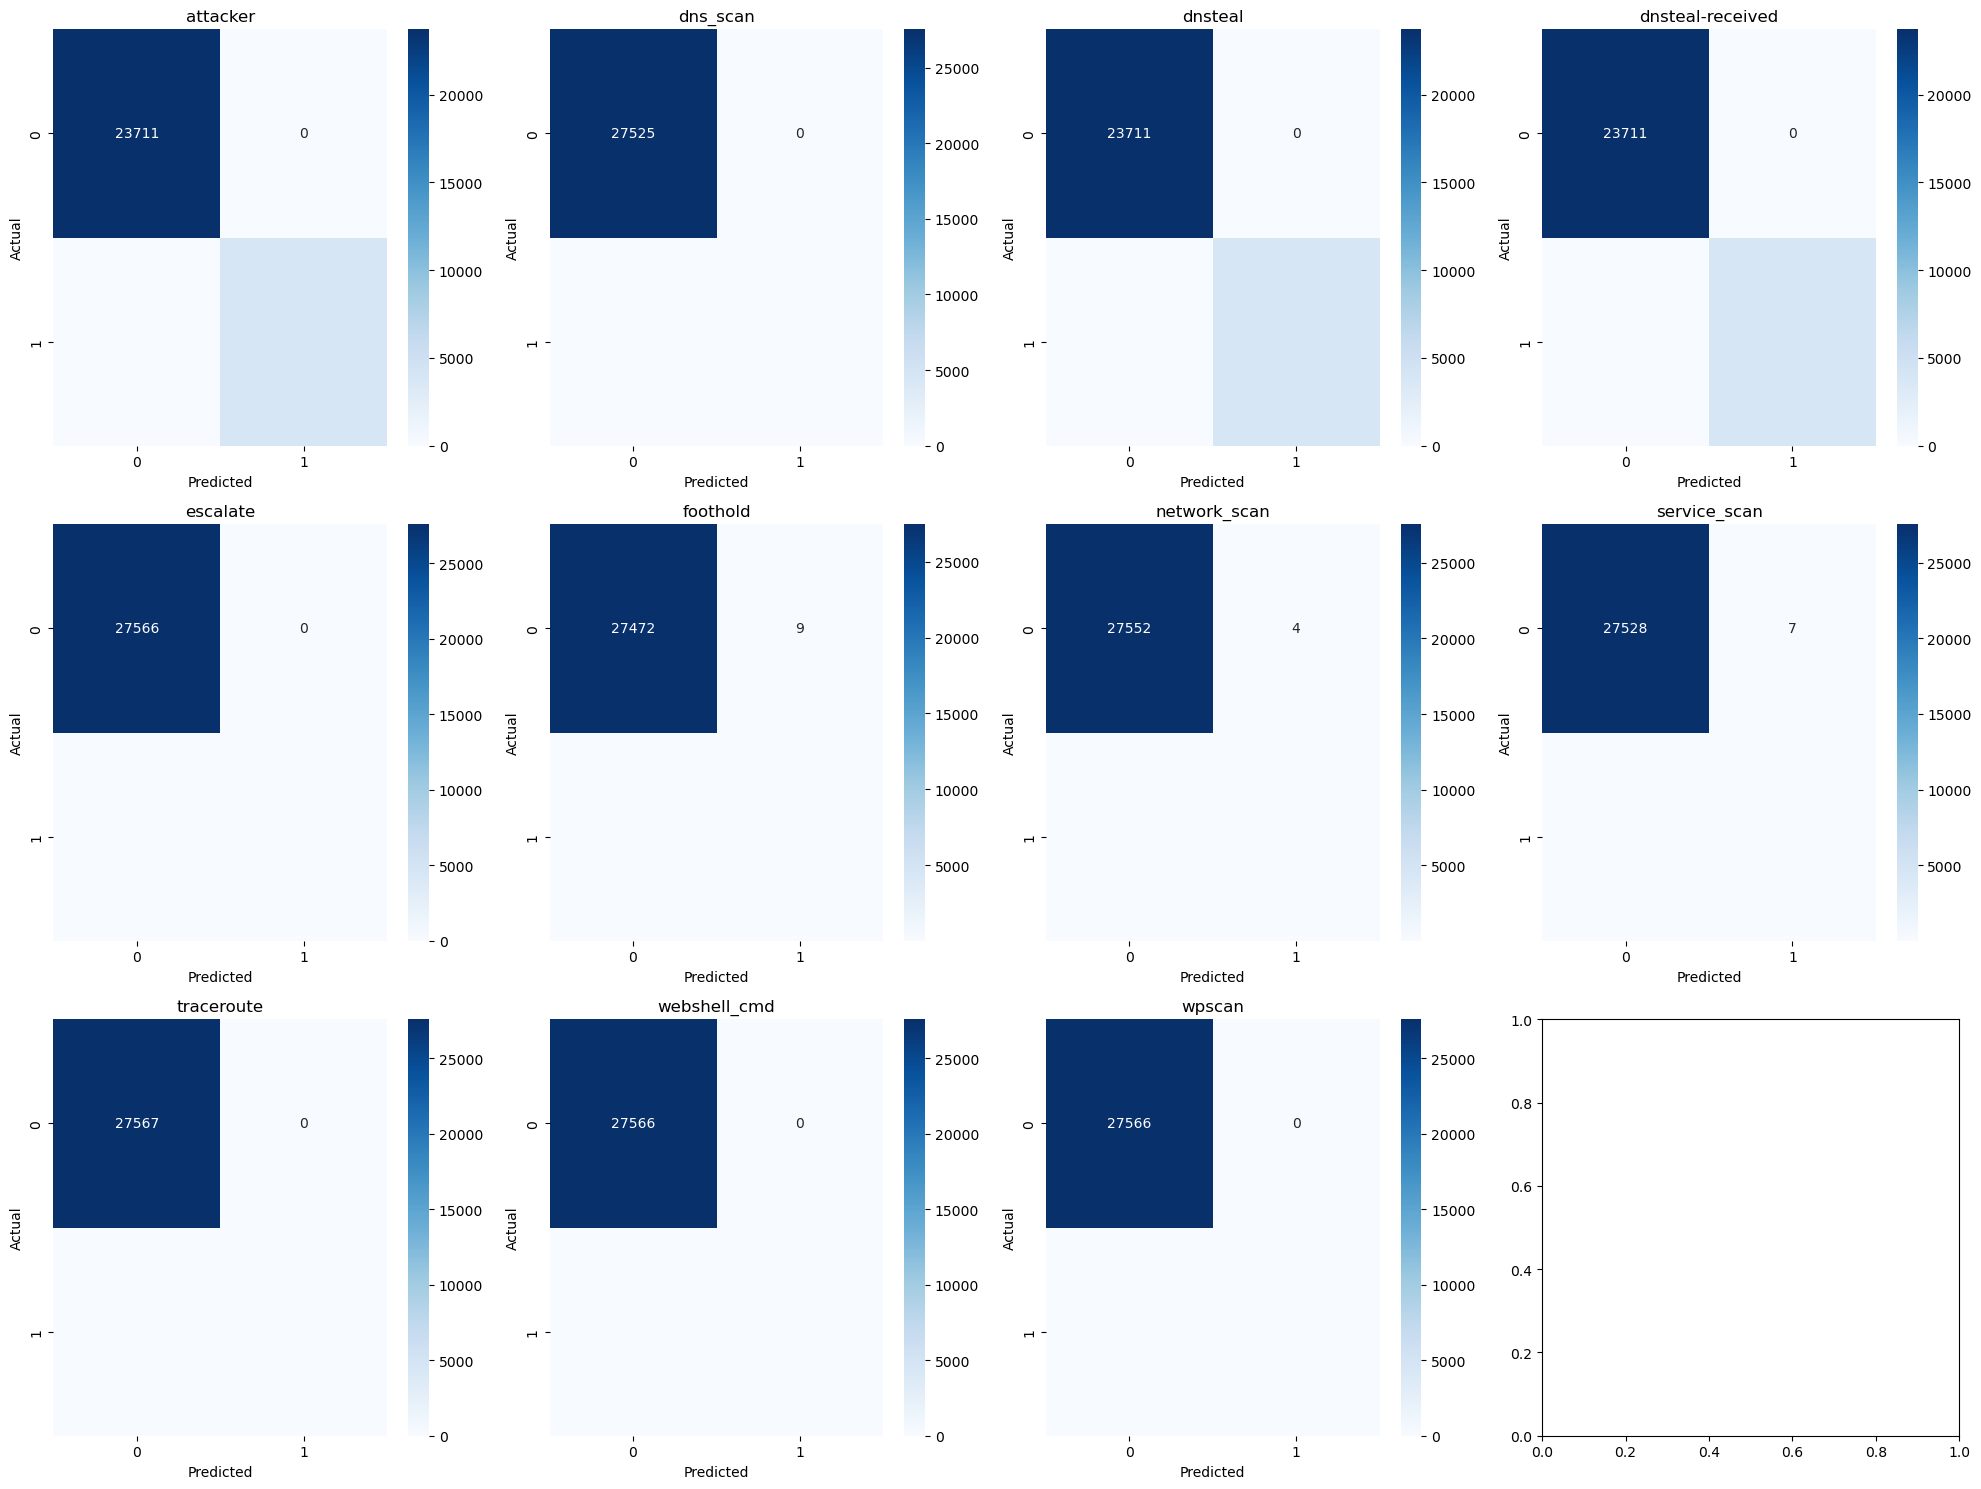

In [47]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate multi-label confusion matrix
mcm = multilabel_confusion_matrix(y_val, y_pred_val)

# Plot each class's confusion matrix
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i, cm in enumerate(mcm):
    if i < len(df_raw.columns[-11:]):
        sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], 
                    cmap='Blues')
        axes[i].set_title(df_raw.columns[-11:][i])
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

TODO: Summarize most important findings

In [62]:
# Save the model and preprocessor to disk
import joblib
import os

if not os.path.exists('trained-models/inet_dnsmasq_log'):
    os.makedirs('trained-models/inet_dnsmasq_log')

if not os.path.exists('trained-models/inet_dnsmasq_log/more'):
    os.makedirs('trained-models/inet_dnsmasq_log/more')

joblib.dump(clf, "trained-models/inet_dnsmasq_log/" + save_classifier_prefix + "rf1.joblib")
joblib.dump(preprocessor, "trained-models/inet_dnsmasq_log/more/" + save_classifier_prefix + "preprocessor1.joblib")

['trained-models/inet_dnsmasq_log/more/santos_dnsmasq_preprocessor1.joblib']

In [49]:
# Extract only the predicted attack related log entries using y_pred and x_test

# Get the indices of the attack related log entries
attack_related_indices = np.where(y_pred[:, 0] == 1)[0]

# Extract the attack related log entries
attack_related_logs = X_test[attack_related_indices]

attack_related_logs

# Convert the attack related log entries back to the original format

# Get the original log entries
original_logs = df_raw.iloc[attack_related_indices]
original_logs


,message_type,timestamp,domain,domain_length,domain_parts,avg_part_length,max_part_length,special_char_count,numeric_char_count,alpha_char_count,entropy,true_type,attacker,dns_scan,dnsteal,dnsteal-received,escalate,foothold,network_scan,service_scan,traceroute,webshell_cmd,wpscan
9,query_srv,2022-01-14 00:00:23,_http._tcp.archive.ubuntu.com,29,5,5.000000,7,2,0,23,3.771437,0,0,0,0,0,0,0,0,0,0,0,0
12,forwarded,2022-01-14 00:00:23,_http._tcp.security.ubuntu.com,30,5,5.200000,8,2,0,24,3.694740,0,0,0,0,0,0,0,0,0,0,0,0
27,query_aaaa,2022-01-14 00:00:23,ppa.launchpad.net,17,3,5.000000,9,0,0,15,3.292770,0,0,0,0,0,0,0,0,0,0,0,0
29,query_aaaa,2022-01-14 00:00:23,security.ubuntu.com,19,3,5.666667,8,0,0,17,3.511085,0,0,0,0,0,0,0,0,0,0,0,0
31,reply,2022-01-14 00:00:23,ppa.launchpad.net,17,3,5.000000,9,0,0,15,3.292770,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55104,query_ptr,2022-01-14 15:29:52,50.131.21.172.in-addr.arpa,26,6,3.500000,7,1,10,10,3.532573,0,0,0,0,0,0,0,0,0,0,0,0
55111,forwarded,2022-01-14 15:29:52,mailserver.smith.santos.com,27,4,6.000000,10,0,0,24,3.661933,0,0,0,0,0,0,0,0,0,0,0,0
55120,nameserver,2022-01-14 15:29:52,None,0,0,0.000000,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0
55122,query_a,2022-01-14 15:29:52,mail.dmz.smith.santos.com,25,5,4.200000,6,0,0,21,3.493661,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
attack_related_indices

array([    9,    12,    27, ..., 55120, 55122, 55133], dtype=int64)

In [51]:
if(not run_training):
    for name in classifiers.keys():
        path = "models/" + save_classifier_prefix + name.replace(" ", "_") + ".joblib"
        print("Loaded ", path)
        classifiers[name] = joblib.load(path)
    
    vectorizer = joblib.load("models/" + save_classifier_prefix + "vectorizer.joblib")

In [52]:
# Manually check a few hardcoded example messages from the validation set

def predict_message(message, classifier):
    # Transform the new message using same vectorizer
    message_vectorized = vectorizer.transform([message])
    # Make prediction
    prediction = classifier.predict(message_vectorized)[0]
    # Get probability scores
    prob = classifier.predict_proba(message_vectorized)[0]
    return prediction, prob

# A few test messages from the validation set 
test_messages = [
    "DHCP REQUEST received from 192.168.1.100",  # normal message example
    "Multiple failed login attempts from IP 10.0.0.5",  # potential attack example
    "completely random message which is definitely not in the database 12345"
]

print(classifiers)

# Test each message with each classifier
for name, clf in classifiers.items():
    print(f"\nResults from {name}:")

    if(not hasattr(clf, "predict_proba")):
        print("This classifier does not support predict_proba().")
        continue

    for msg in test_messages:
        prediction, probabilities = predict_message(msg, clf)
        print(f"\nMessage: {msg}")
        print(f"Prediction: {'attack' if prediction == 1 else 'normal'}")
        print(f"Probability scores: normal: {probabilities[0]:.3f}, attack: {probabilities[1]:.3f}")

NameError: name 'classifiers' is not defined

In [ ]:
# Troubleshooting torch installation

import sys
import torch

print("Python version:", sys.version)
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("MPS available:", torch.backends.mps.is_available())

Python version: 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
PyTorch version: 2.5.1
CUDA available: True
MPS available: False


In [ ]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

x = torch.rand(5, 3)
print(x)


# Choose Hardware, Cuda uses GPU
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")



tensor([[0.2080, 0.3287, 0.9768],
        [0.5334, 0.8998, 0.8214],
        [0.0524, 0.5391, 0.3852],
        [0.7970, 0.6768, 0.3625],
        [0.5006, 0.1089, 0.9172]])
Using cuda device


In [ ]:
# Test PyTorch Model using their tutorial (mainly to test installation & hardware)
X = torch.rand(1, 28, 28, device=device)
logits = nn_model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

NameError: name 'nn_model' is not defined

In [ ]:
#Define class, (currently pytorch default)
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1000, 11005),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
#Create model instance
nn_model = NeuralNetwork().to(device)
print(nn_model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1000, out_features=11005, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
df_with_o_h.describe(include="object")

,true_type,labels
count,24050,24050
unique,1,1
top,1,"['dnsteal', 'attacker', 'd..."
freq,24050,24050


In [ ]:
df_with_o_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 11007 entries, timestamp to 9_msgt
dtypes: datetime64[ns](1), float64(11001), int64(3), object(2)
memory usage: 8.2+ GB


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import torch
import numpy as np

# Preprocessing pipeline
# Only take first 1000 rows for now (memory limit and speed up)
X = df_with_o_h.iloc[0:1000].drop(["true_type", "labels"], axis=1)

# Ensure all column names are strings
X.columns = X.columns.astype(str)

# Convert datetime columns to numerical features
for col in X.select_dtypes(include=['datetime64']).columns:
    X[col] = X[col].astype('int64')  # Convert datetime to timestamp

# Drop any remaining non-numeric columns
X = X.select_dtypes(include=[np.number])

# Prepare labels
y = df_with_o_h.iloc[0:1000]["true_type"]

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_encoded, dtype=torch.long)

# Print some information
print("Unique labels:", label_encoder.classes_)
print("X tensor shape:", X_tensor.shape)
print("y tensor shape:", y_tensor.shape)

Unique labels: ['1' nan]
X tensor shape: torch.Size([1000, 11005])
y tensor shape: torch.Size([1000])


In [ ]:
logits = nn_model(X_tensor.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1000x11005 and 1000x11005)